In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In [30]:
player = pd.read_csv("player.csv")
player["birthday"] = pd.to_datetime(player.birthday)
player["birthyear"] = player["birthday"].dt.strftime("%Y").astype(int)
player["birthmonth"] = player["birthday"].dt.strftime("%m").astype(int)
player.head()

,player_id,player_name,birthday,height,weight,birthyear,birthmonth
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2
1,155782,Aaron Cresswell,1989-12-15,170.18,146,1989,12
2,162549,Aaron Doran,1991-05-13,170.18,163,1991,5
3,30572,Aaron Galindo,1982-05-08,182.88,198,1982,5
4,23780,Aaron Hughes,1979-11-08,182.88,154,1979,11


In [31]:
playerattribute = pd.read_csv("player_attributes.csv")
playerattribute["date"] = pd.to_datetime(playerattribute.date)
playerattribute["year"] = playerattribute["date"].dt.strftime("%Y").astype(int)
playerattribute["month"] = playerattribute["date"].dt.strftime("%m").astype(int)
playerattribute.head()

,player_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month
0,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2
1,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11
2,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9
3,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3
4,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2


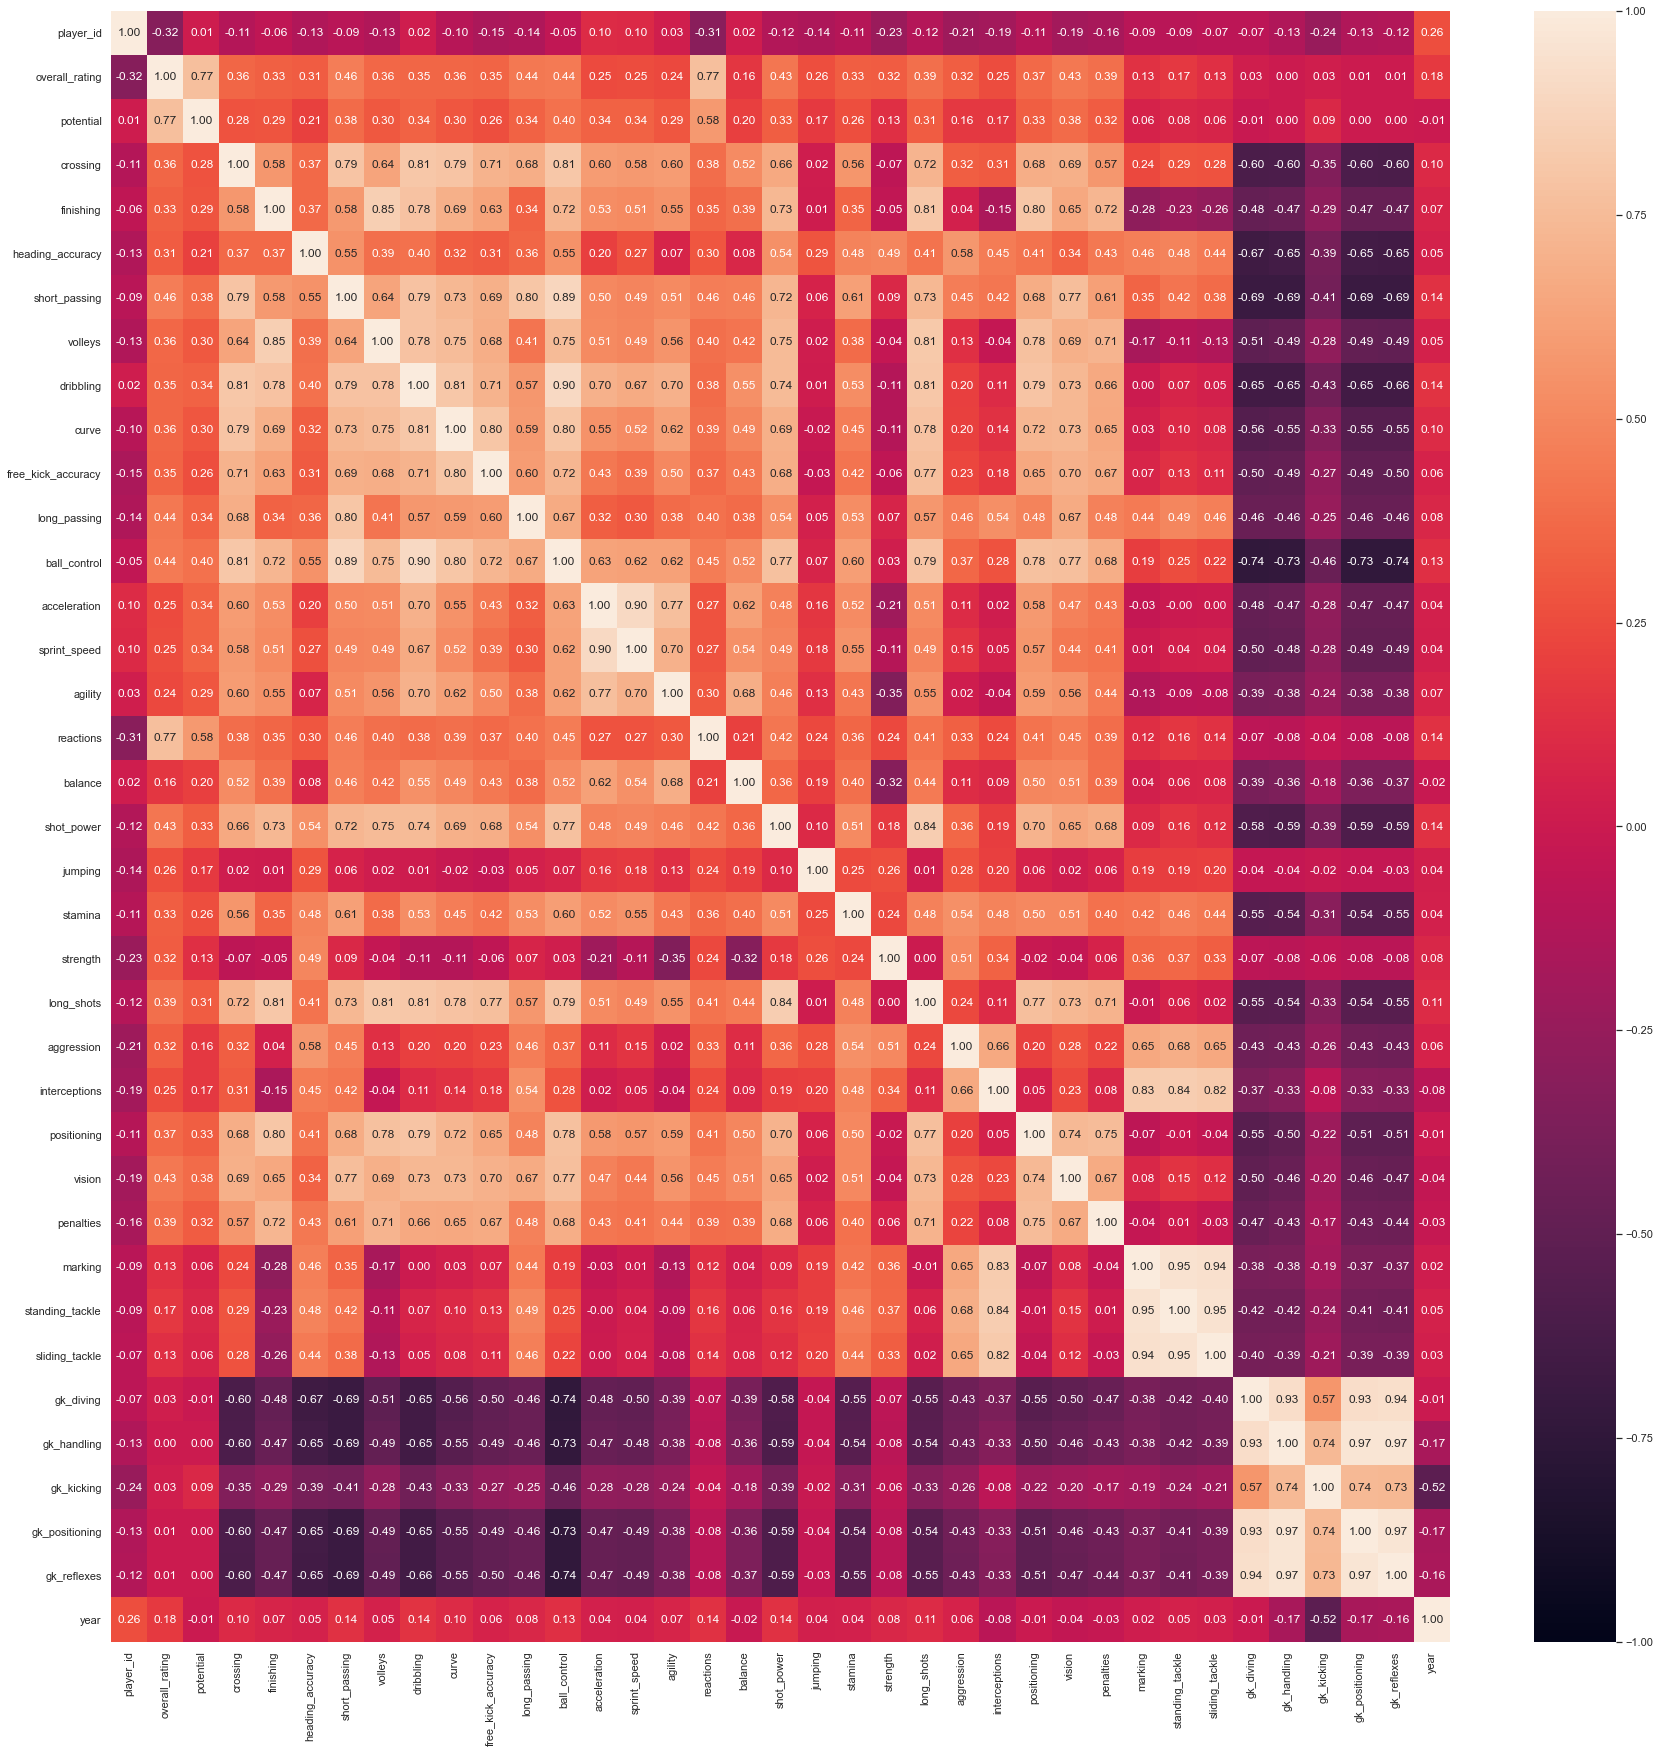

In [7]:
playerattribute.corr()
f = plt.figure(figsize=(30,30))
sb.heatmap(playerattribute.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [32]:
player = player.merge(playerattribute, on = "player_id")
player.head()

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2016-02-18,67.0,71.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-11-19,67.0,71.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-09-21,62.0,66.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-03-20,61.0,65.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2007-02-22,61.0,65.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2


In [33]:
player["birthyear"] = np.where(player["birthyear"] > 2030, player["birthyear"] - 100, player["birthyear"])
player["age"] = (player["year"] + player["month"]/12) - (player["birthyear"] + player["birthmonth"]/12)
player["age_rounded"] = player["age"].round().astype(int)
player.head()

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,age,age_rounded
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2016-02-18,67.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,24.000000,24
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-11-19,67.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,23.750000,24
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-09-21,62.0,66.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,23.583333,24
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-03-20,61.0,65.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2015,3,23.083333,23
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2007-02-22,61.0,65.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2007,2,15.000000,15


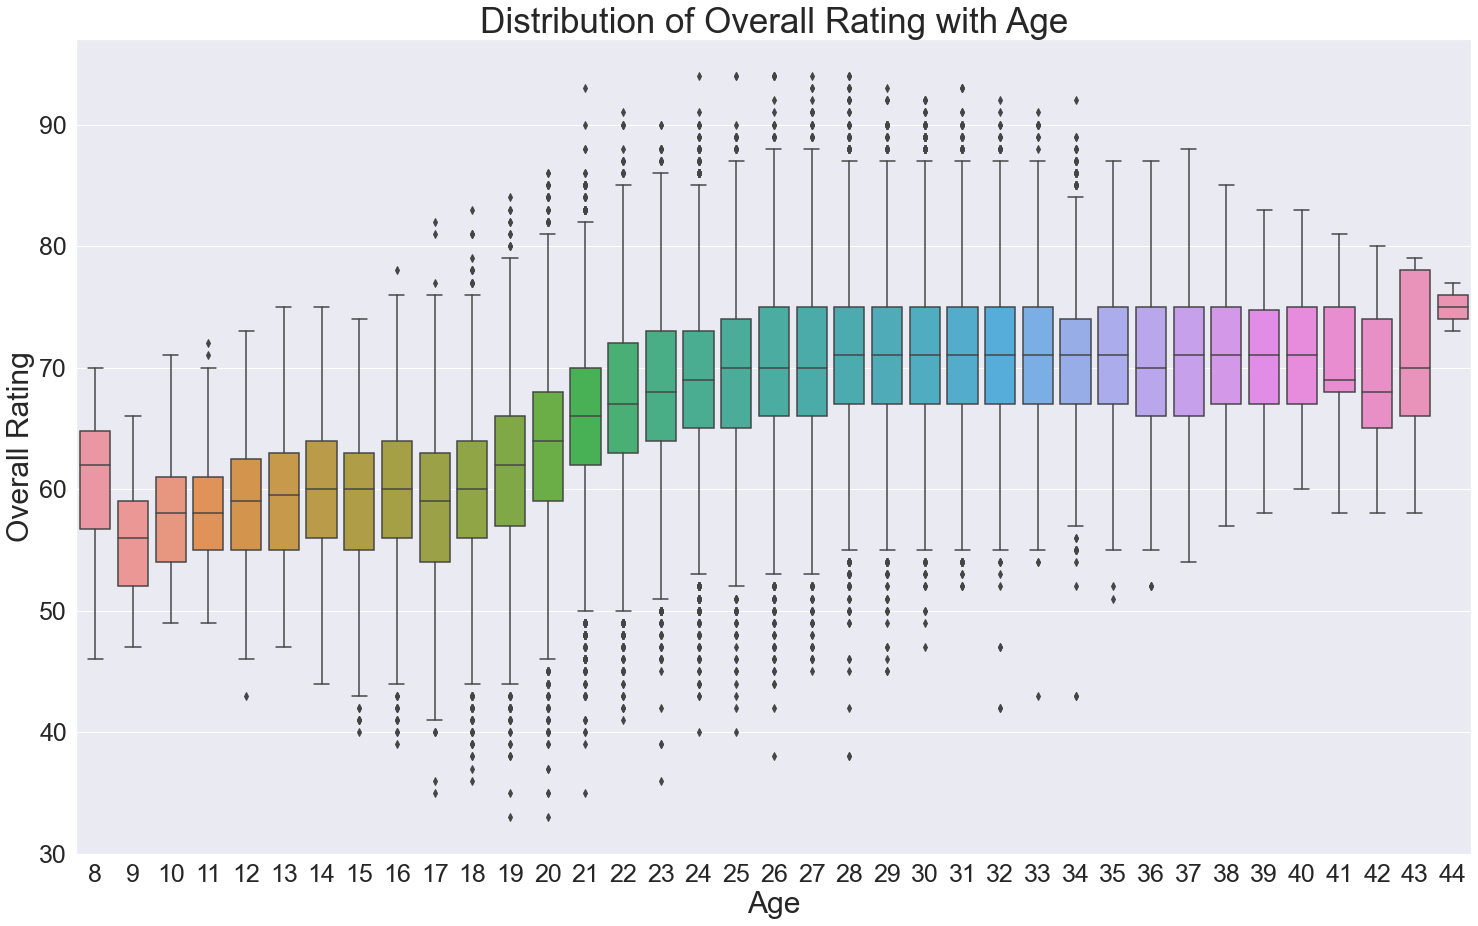

In [34]:
f = plt.figure(figsize = (25,15))
sb.boxplot(data = player, y = "overall_rating", x = "age_rounded")
plt.xlabel("Age", fontsize = 30)
plt.ylabel("Overall Rating", fontsize = 30)
plt.title("Distribution of Overall Rating with Age", fontsize = 35)
plt.tick_params(labelsize = 25)

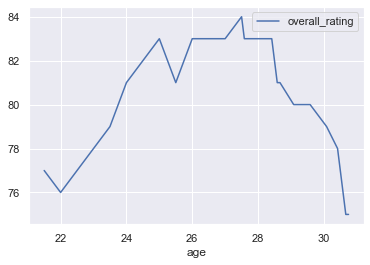

In [22]:
p2 = player[player["player_name"] == "Antonio Valencia"]
p2.plot(y = "overall_rating", x = "age")

In [35]:
max_rating = pd.DataFrame(player.groupby(['player_id'])['overall_rating'].max())
max_rating.rename(columns={'overall_rating':'max_rating'}, inplace=True)
player = player.merge(max_rating, on = "player_id")
player

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,age,age_rounded,max_rating
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2016-02-18,67.0,71.0,...,6.0,11.0,10.0,8.0,8.0,2016,2,24.000000,24,67.0
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-11-19,67.0,71.0,...,6.0,11.0,10.0,8.0,8.0,2015,11,23.750000,24,67.0
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-09-21,62.0,66.0,...,6.0,11.0,10.0,8.0,8.0,2015,9,23.583333,24,67.0
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-03-20,61.0,65.0,...,5.0,10.0,9.0,7.0,7.0,2015,3,23.083333,23,67.0
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2007-02-22,61.0,65.0,...,5.0,10.0,9.0,7.0,7.0,2007,2,15.000000,15,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-08-30,83.0,85.0,...,9.0,20.0,84.0,20.0,20.0,2009,8,27.166667,27,83.0
183974,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-02-22,78.0,80.0,...,9.0,20.0,73.0,20.0,20.0,2009,2,26.666667,27,83.0
183975,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2008-08-30,77.0,80.0,...,9.0,20.0,73.0,20.0,20.0,2008,8,26.166667,26,83.0
183976,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2007-08-30,78.0,81.0,...,9.0,20.0,73.0,20.0,20.0,2007,8,25.166667,25,83.0


In [36]:
maxidx = pd.DataFrame(player.groupby(['player_id'])['overall_rating'].idxmax())
maxidx.rename(columns={'overall_rating':'max_idx'}, inplace=True)
player = player.merge(maxidx, on = "player_id")
player

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,age,age_rounded,max_rating,max_idx
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2016-02-18,67.0,71.0,...,11.0,10.0,8.0,8.0,2016,2,24.000000,24,67.0,0
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-11-19,67.0,71.0,...,11.0,10.0,8.0,8.0,2015,11,23.750000,24,67.0,0
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-09-21,62.0,66.0,...,11.0,10.0,8.0,8.0,2015,9,23.583333,24,67.0,0
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-03-20,61.0,65.0,...,10.0,9.0,7.0,7.0,2015,3,23.083333,23,67.0,0
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2007-02-22,61.0,65.0,...,10.0,9.0,7.0,7.0,2007,2,15.000000,15,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-08-30,83.0,85.0,...,20.0,84.0,20.0,20.0,2009,8,27.166667,27,83.0,183972
183974,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-02-22,78.0,80.0,...,20.0,73.0,20.0,20.0,2009,2,26.666667,27,83.0,183972
183975,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2008-08-30,77.0,80.0,...,20.0,73.0,20.0,20.0,2008,8,26.166667,26,83.0,183972
183976,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2007-08-30,78.0,81.0,...,20.0,73.0,20.0,20.0,2007,8,25.166667,25,83.0,183972


In [101]:
x = 0
while x < player.shape[0]:
    player.loc[x,"max_age"] = player.loc[player.loc[x,"max_idx"]]["age_rounded"]
    x += 1
player

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,gk_kicking,gk_positioning,gk_reflexes,year,month,age,age_rounded,max_rating,max_idx,max_age
0,24,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2016-02-18,67.0,71.0,...,10.0,8.0,8.0,2016,2,24.000000,24,67.0,0,24
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-11-19,67.0,71.0,...,10.0,8.0,8.0,2015,11,23.750000,24,67.0,0,24
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-09-21,62.0,66.0,...,10.0,8.0,8.0,2015,9,23.583333,24,67.0,0,24
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2015-03-20,61.0,65.0,...,9.0,7.0,7.0,2015,3,23.083333,23,67.0,0,24
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,1992,2,2007-02-22,61.0,65.0,...,9.0,7.0,7.0,2007,2,15.000000,15,67.0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-08-30,83.0,85.0,...,84.0,20.0,20.0,2009,8,27.166667,27,83.0,183972,28
183974,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2009-02-22,78.0,80.0,...,73.0,20.0,20.0,2009,2,26.666667,27,83.0,183972,28
183975,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2008-08-30,77.0,80.0,...,73.0,20.0,20.0,2008,8,26.166667,26,83.0,183972,28
183976,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,1982,6,2007-08-30,78.0,81.0,...,73.0,20.0,20.0,2007,8,25.166667,25,83.0,183972,28


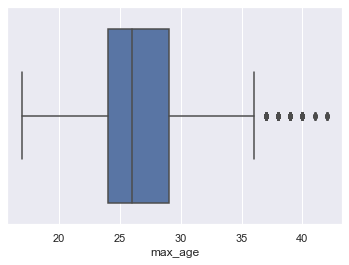

In [106]:
sb.boxplot(data = player, y = "max_age", orient = 'h')

In [49]:
player = pd.read_csv("newplayer.csv")

In [51]:
player.sort_values(["player_id","year","month"], ascending = [True,False,False], inplace = True)
player.reset_index(inplace = True)
player.drop(labels = ["index","level_0"], axis = "columns", inplace = True)
player

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,month,age,age_rounded,max_rating,max_idx,max_age,abs_growth,perc_growth,year_elapsed,start_rating
0,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,1/16/2015,61,61,...,1,34.000000,34,63,139855,27,-2.0,-3.174603,7.916667,63
1,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,11/7/2014,61,61,...,11,33.833333,34,63,139855,27,-2.0,-3.174603,7.750000,63
2,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,9/18/2014,61,61,...,9,33.666667,34,63,139855,27,-2.0,-3.174603,7.583333,63
3,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,6/7/2013,61,61,...,6,32.416667,32,63,139855,27,-2.0,-3.174603,6.333333,63
4,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,3/8/2013,61,61,...,3,32.166667,32,63,139855,27,-2.0,-3.174603,6.083333,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183137,750435,Rees Greenwood,1/20/1996,172.72,150,1996,1,2/6/2015,56,70,...,2,19.083333,19,60,147408,20,0.0,0.000000,8.000000,56
183138,750435,Rees Greenwood,1/20/1996,172.72,150,1996,1,1/16/2015,56,70,...,1,19.000000,19,60,147408,20,0.0,0.000000,7.916667,56
183139,750435,Rees Greenwood,1/20/1996,172.72,150,1996,1,2/22/2007,56,70,...,2,11.083333,11,60,147408,20,0.0,0.000000,0.000000,56
183140,750584,Alexandre Azevedo,1/28/1997,175.26,150,1997,1,5/19/2016,58,66,...,5,19.333333,19,58,8085,19,0.0,0.000000,9.250000,58


In [52]:
droplist = []
test = player.copy()
i =0 
while i < test.shape[0]:
    if not test.loc[i, "overall_rating"] > 30:
        droplist.append(i)
    i += 1

In [45]:
i = 0
while i < player.shape[0]:
    playerid = player.loc[i,"player_id"]
    j = i
    while  player.loc[j,"player_id"] == playerid:
        j += 1
    firstrating = player.loc[j-1,"overall_rating"]
    while not firstrating > 30:
        j -= 1
        firstrating = player.loc[j-1,"overall_rating"]
    startyear = player.loc[j-1, "year"] + player.loc[j-1, "month"]/12
    for k in range(i,j):
        player.loc[k,'abs_growth'] = player.loc[k,"overall_rating"] - firstrating
        player.loc[k,'perc_growth'] = 100*player.loc[k,"abs_growth"]/firstrating
        currentyear = player.loc[k, "year"] + player.loc[k, "month"]/12
        player.loc[k,'year_elapsed'] = currentyear - startyear
        player.loc[k,'start_rating'] = firstrating
    i = j
    if i == player.shape[0] or j == player.shape[0]:
        break

KeyboardInterrupt: 

In [53]:
player2 = player.copy()
player2.drop(player2[player2.year_elapsed > 5].index, inplace = True)
player2["year_elapsed"] = player2["year_elapsed"].round(0)
player2

,player_id,player_name,birthday,height,weight,birthyear,birthmonth,date,overall_rating,potential,...,month,age,age_rounded,max_rating,max_idx,max_age,abs_growth,perc_growth,year_elapsed,start_rating
7,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,2/22/2012,58,58,...,2,31.083333,31,63,139855,27,-5.0,-7.936508,5.0,63
8,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,8/30/2011,58,58,...,8,30.583333,31,63,139855,27,-5.0,-7.936508,4.0,63
9,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,2/22/2011,59,63,...,2,30.083333,30,63,139855,27,-4.0,-6.349206,4.0,63
10,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,8/30/2010,60,64,...,8,29.583333,30,63,139855,27,-3.0,-4.761905,4.0,63
11,2625,"Patryk Rachwal,18",1/27/1981,175.26,154,1981,1,8/30/2008,60,64,...,8,27.583333,28,63,139855,27,-3.0,-4.761905,2.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183126,744907,Greg Taylor,11/5/1997,172.72,137,1997,11,2/22/2007,51,65,...,2,9.250000,9,53,66601,19,0.0,0.000000,0.0,51
183128,746419,Francisco Afonso,4/24/1997,175.26,152,1997,4,2/22/2007,59,66,...,2,9.833333,10,59,58304,19,0.0,0.000000,0.0,59
183130,748432,Fynn Arkenberg,3/4/1996,187.96,176,1996,3,2/22/2007,58,68,...,2,10.916667,11,58,60179,20,0.0,0.000000,0.0,58
183139,750435,Rees Greenwood,1/20/1996,172.72,150,1996,1,2/22/2007,56,70,...,2,11.083333,11,60,147408,20,0.0,0.000000,0.0,56


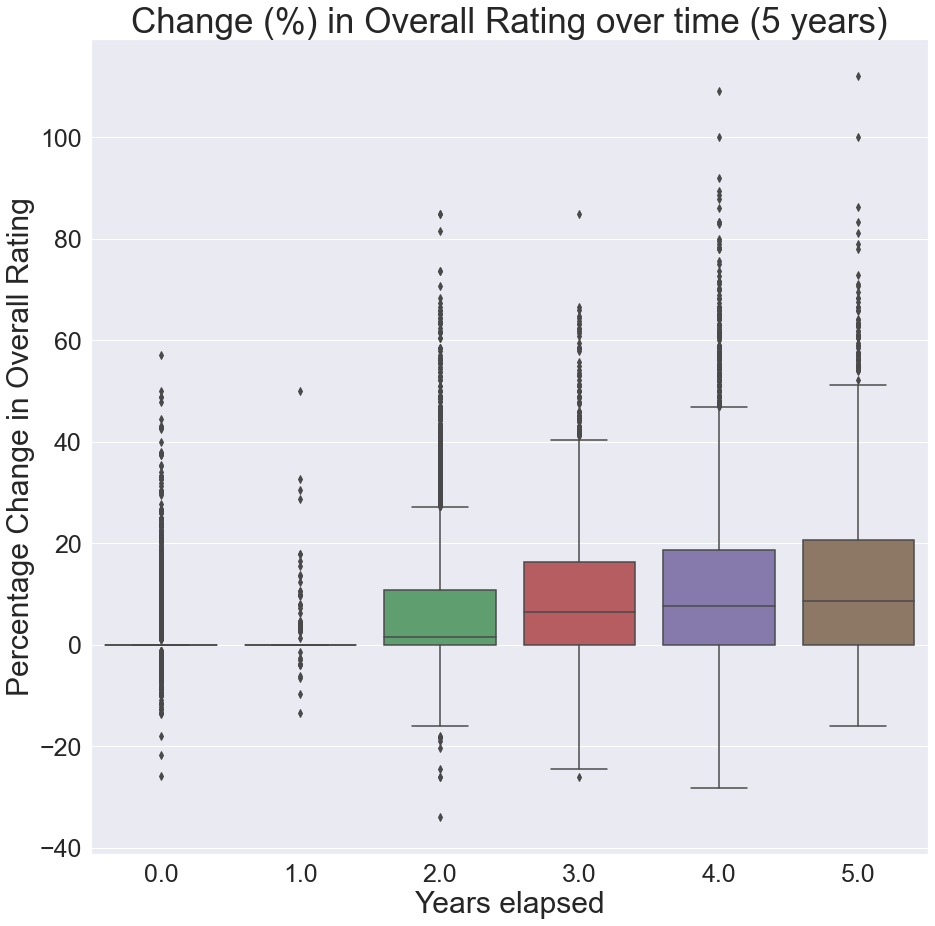

In [54]:
f = plt.figure(figsize = (15,15))
g = sb.boxplot(data = player2[player2.age < 25], y = "perc_growth", x = "year_elapsed")
g.set_title("Change (%) in Overall Rating over time (5 years)", fontsize = 35)
g.set_xlabel("Years elapsed", fontsize = 30)
g.set_ylabel("Percentage Change in Overall Rating", fontsize = 30)
g.tick_params(labelsize = 25)

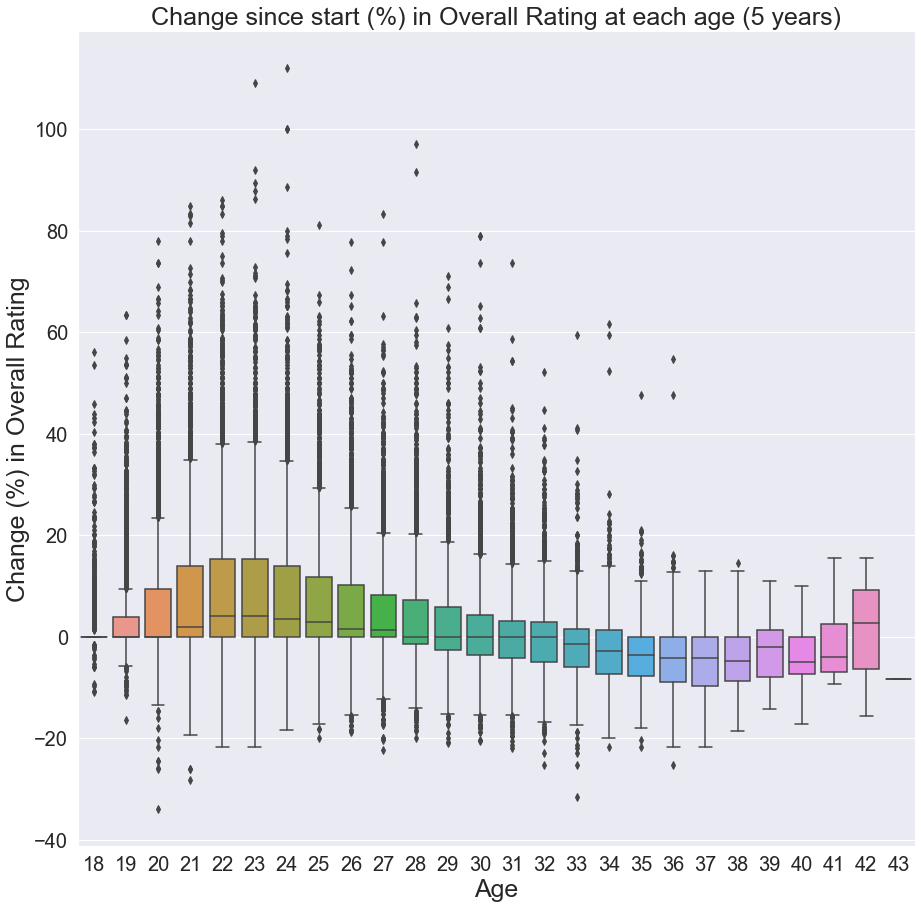

In [55]:
player3 = player2.copy()
player3.drop(player2[player2.age < 18].index, inplace = True)
f = plt.figure(figsize = (15,15))
g = sb.boxplot(data = player3, y = "perc_growth", x = "age_rounded")
g.set_title("Change since start (%) in Overall Rating at each age (5 years)", fontsize = 25)
g.set_xlabel("Age", fontsize = 25)
g.set_ylabel("Change (%) in Overall Rating", fontsize = 25)
g.tick_params(labelsize = 20)

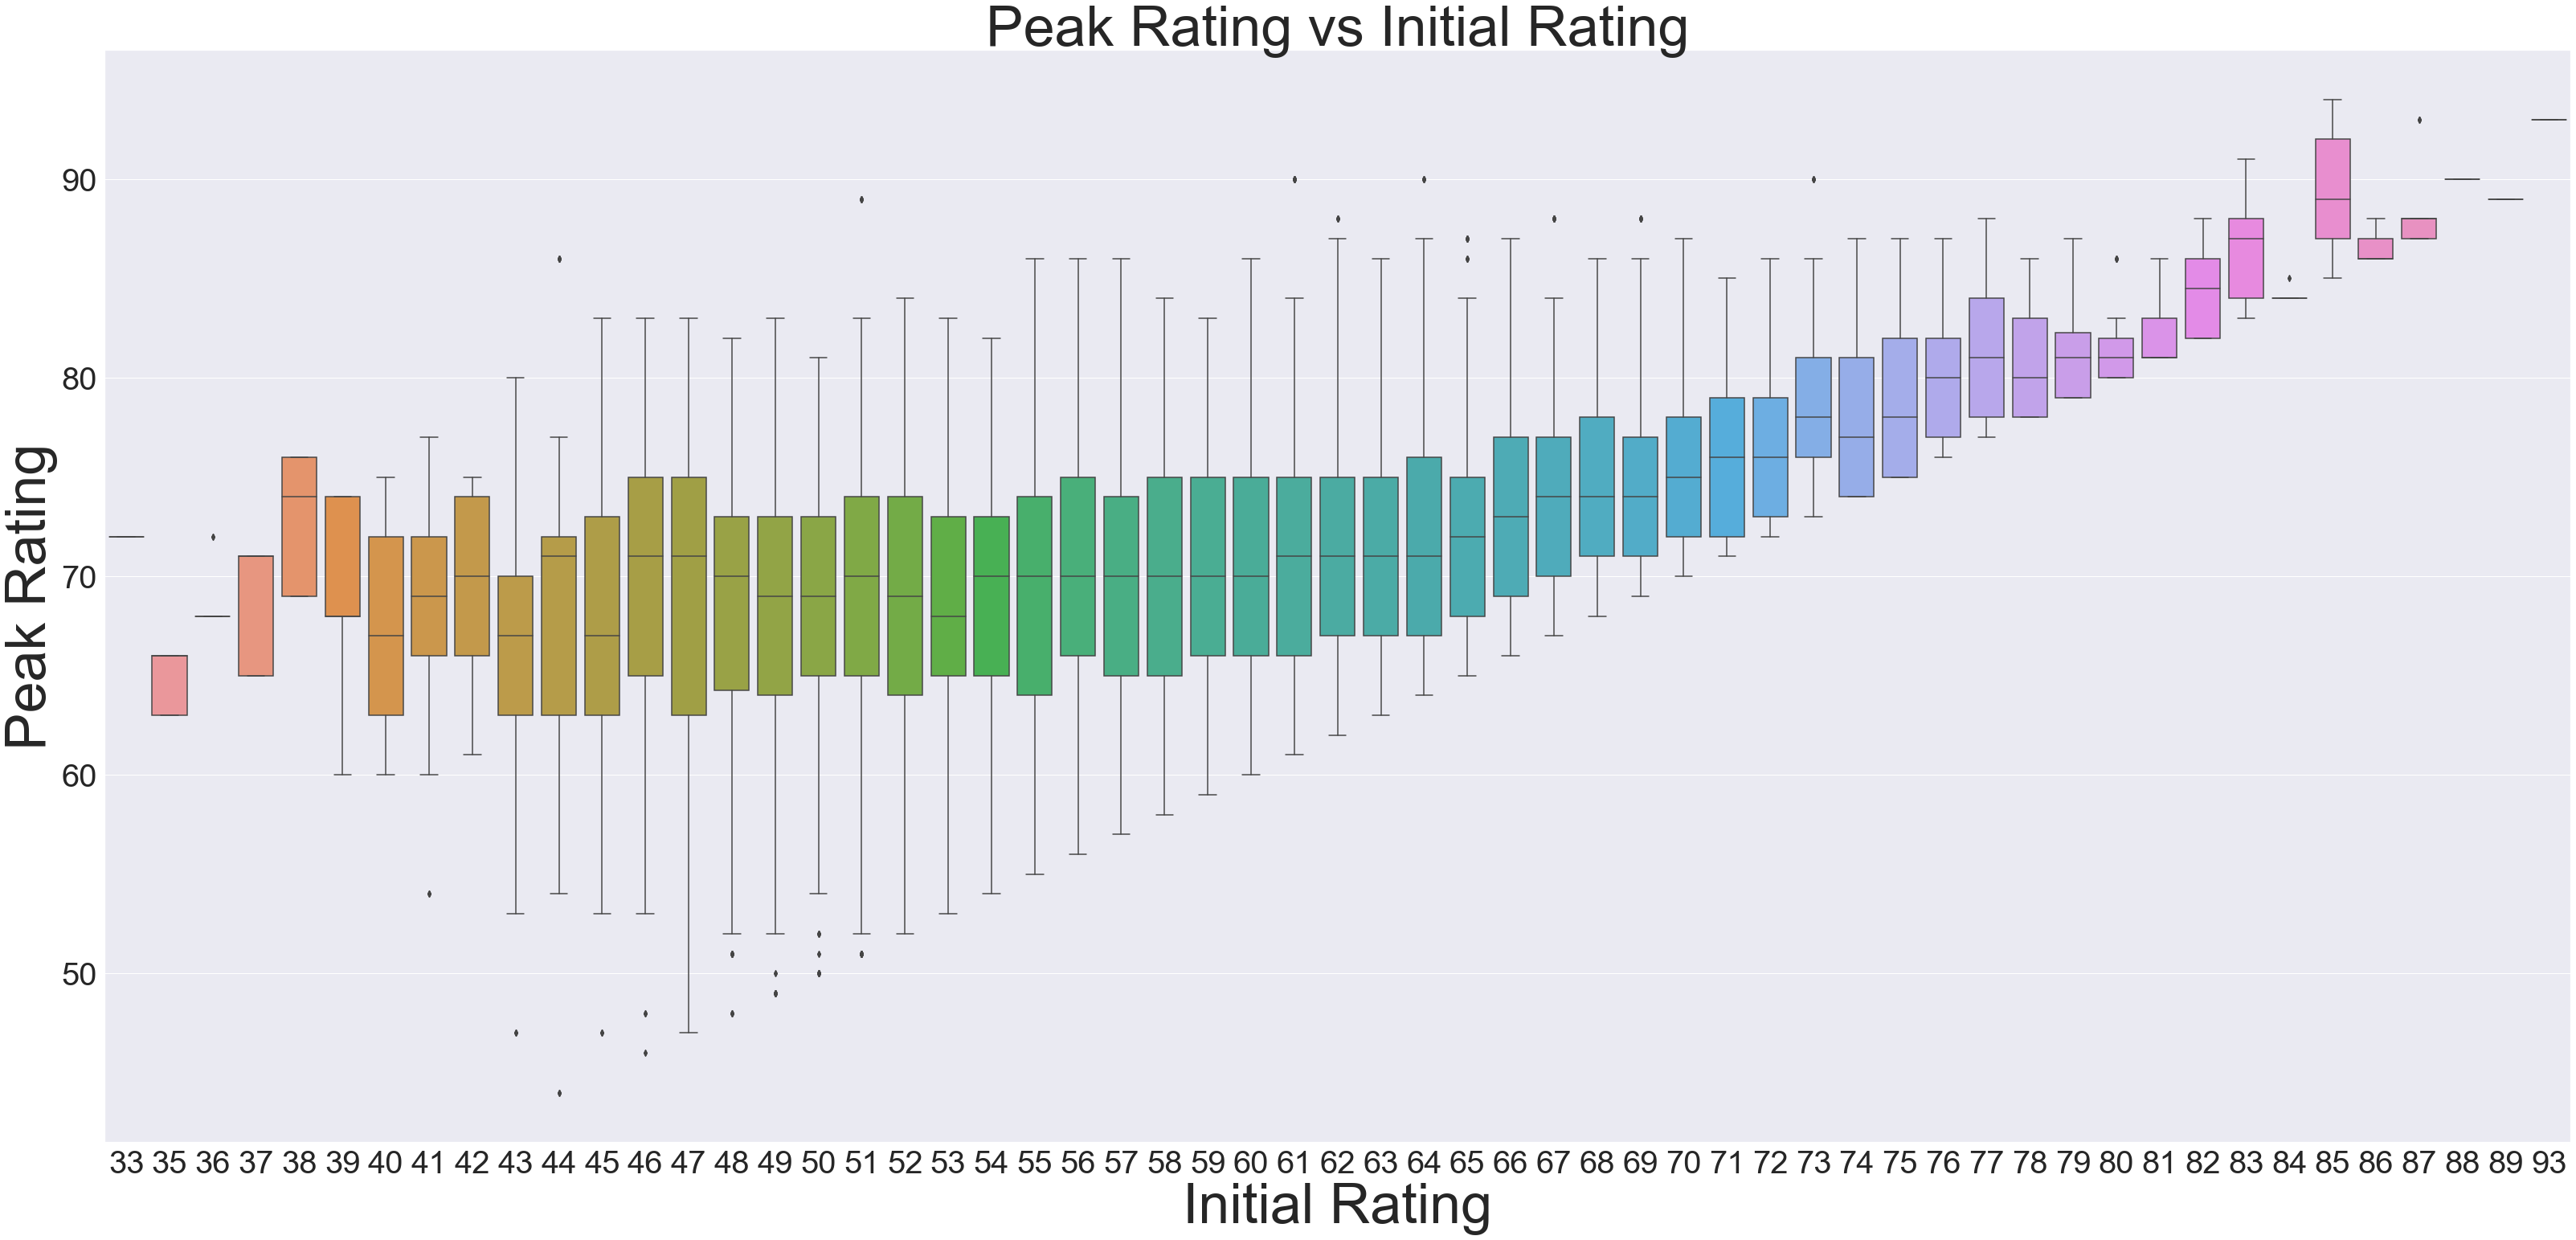

In [56]:
f = plt.figure(figsize = (55,25))
sb.boxplot(data = player2[player2.age < 25], x = "start_rating", y = "max_rating")
plt.title("Peak Rating vs Initial Rating", fontsize = 70)
plt.xlabel("Initial Rating", fontsize = 70)
plt.ylabel("Peak Rating", fontsize = 70)
#plt.xticks(np.arange(0,93,5))
plt.tick_params(labelsize = 40)